In [15]:
# 使用するモデルのインポート
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [16]:
# その他のモジュールのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,
                             confusion_matrix, ConfusionMatrixDisplay)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint, expon
import random

In [17]:
# ファイルの読み込み、データの格納・欠損値処理・確認
# file_path = "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/ビニング処理_卒研A.csv"
# file_path = "E:/実験/実験結果/卒研B/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
# file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
# file_path =  "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/vif_result.csv"
file_path =  "C:/Users/thisi/OneDrive/共有ファイル/卒研B/データ最終版/2. 最終ファイルVIF主成分分析後 (2値sddis追加).csv"
target_column = "SD_dis"
data = pd.read_csv(file_path)
data = data.drop(columns=["SD_con","Interest","Duration_of_first_Visit"])
data = data.fillna(data.mean())
data.info()
X = data.drop(columns=[target_column])
y = data[target_column]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 46 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   SD_dis                                                   538 non-null    int64  
 1   readers'_vocabulary                                      538 non-null    float64
 2   Average_duration_of_fixations                            538 non-null    float64
 3   Minimum_duration_of_fixations                            538 non-null    float64
 4   Maximum_duration_of_fixations                            538 non-null    float64
 5   Number_of_fixations                                      538 non-null    float64
 6   Duration_of_first_fixation                               538 non-null    float64
 7   Average_pupil_diameter                                   538 non-null    float64
 8   Average_duration_of_Visit_per_

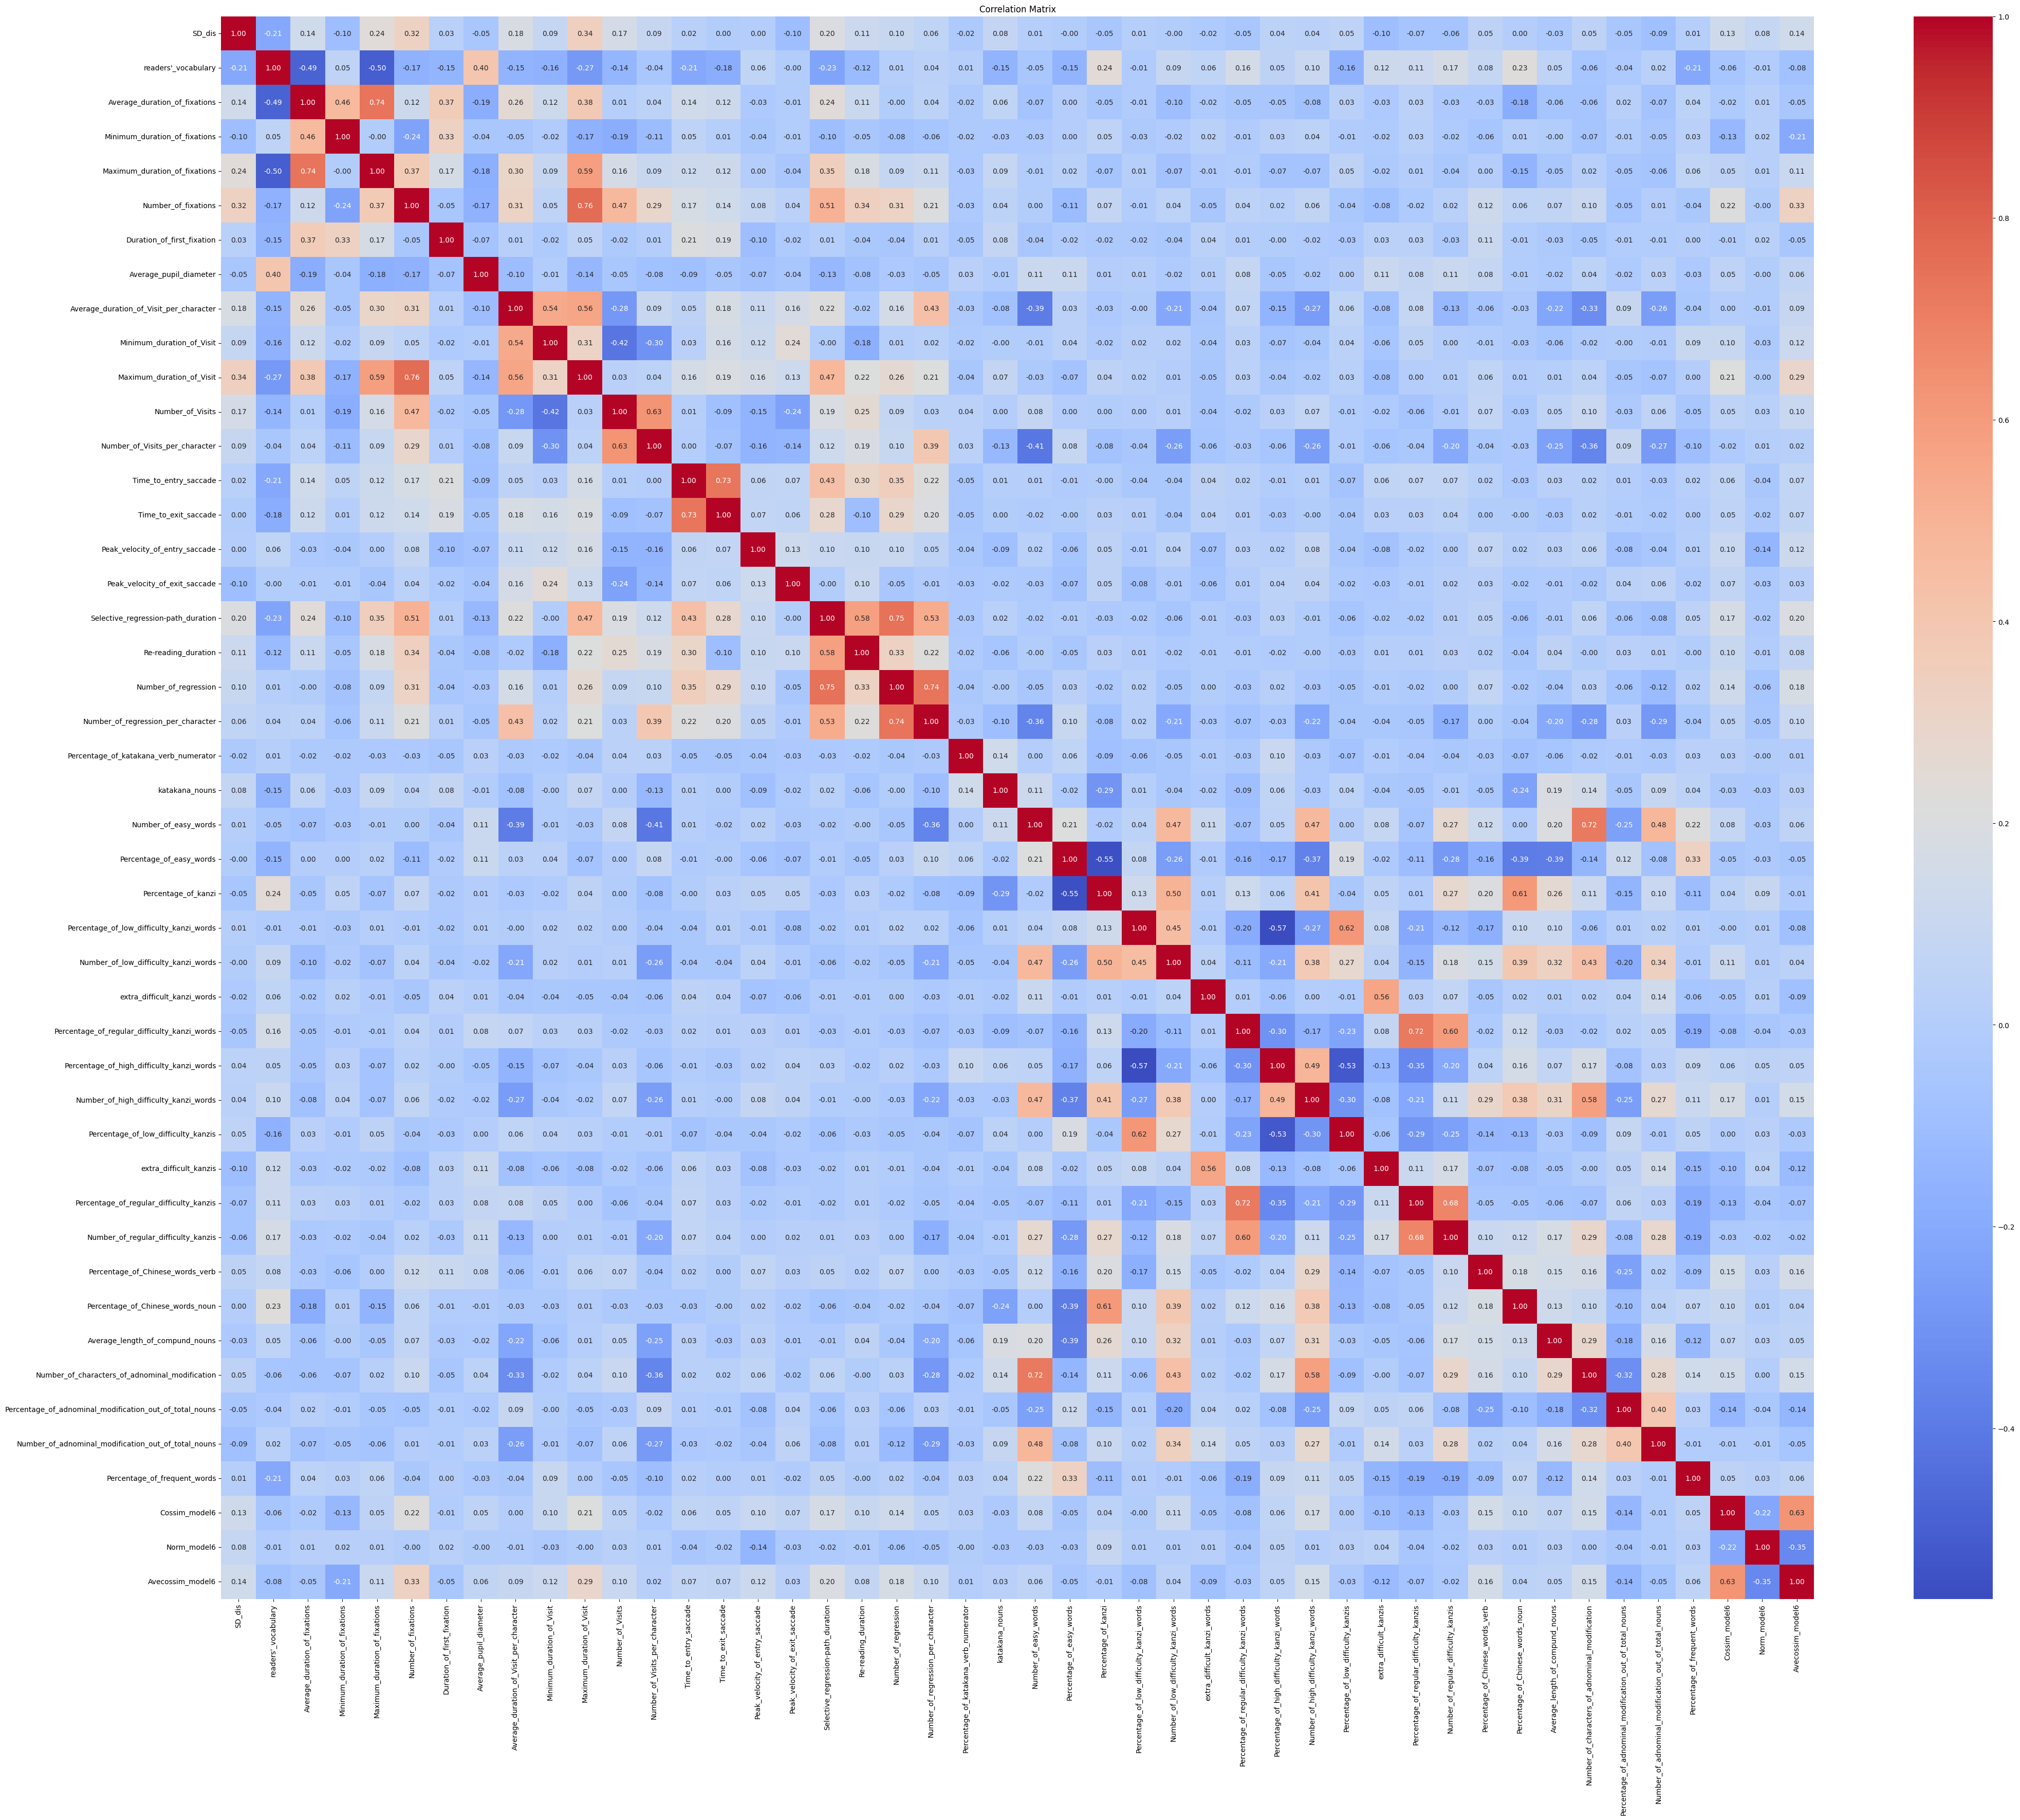

In [18]:
# データの可視化
plt.figure(figsize=(50, 40))
corr_matrix = data.corr('pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# # データの可視化
# plt.figure(figsize=(50, 40))
# corr_matrix = data.corr('spearman')
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix")
# plt.show()

# # 散布図行列は時間かかるのでやりたいときだけ
# sns.pairplot(data)
# plt.title("Scatter Plot Matrix")
# plt.show()

In [19]:
# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
# # 特徴量選択
# sfs = SFS(RandomForestClassifier(),
#           k_features="best",
#           forward = False,
#           floating= True,
#           scoring = 'accuracy',
#           cv = skf,
#           n_jobs= -1)

# sfs = sfs.fit(X, y)

# # 選択された特徴量の表示
# selected_features = sfs.k_feature_names_
# selected_features

In [21]:
specific_feature = ['Maximum_duration_of_Visit',
 'Number_of_Visits_per_character',
 'Time_to_entry_saccade',
 'Number_of_regression',
 'extra_difficult_kanzi_words',
 'Percentage_of_regular_difficulty_kanzi_words',
 'Percentage_of_adnominal_modification_out_of_total_nouns',
 'Cossim_model6',
 'Norm_model6']

# specific_feature = ['Maximum_duration_of_Visit',
#  'Number_of_Visits_per_character',
#  'Time_to_entry_saccade',
#  'Number_of_regression',
#  'extra_difficult_kanzi_words',
#  'Percentage_of_regular_difficulty_kanzi_words',
#  'Percentage_of_adnominal_modification_out_of_total_nouns',
# ]

sfs = "None"

type(specific_feature)

list

In [22]:
# selected_features = X.columns #全特徴量のとき
selected_features = specific_feature #特徴量指定したいとき

# 選択された特徴量のみをXに指定
X_slected = X[list(selected_features)]
X_slected.head()

,Maximum_duration_of_Visit,Number_of_Visits_per_character,Time_to_entry_saccade,Number_of_regression,extra_difficult_kanzi_words,Percentage_of_regular_difficulty_kanzi_words,Percentage_of_adnominal_modification_out_of_total_nouns,Cossim_model6,Norm_model6
0,-0.343989,-0.810440,-1.150092,-0.935274,-0.193359,-0.686289,1.053415,0.695937,0.224689
1,1.100091,-0.124227,-1.159635,-0.935274,-0.193359,-0.686289,-0.276486,0.446496,-0.891166
2,0.027721,-0.133894,-0.320546,-0.935274,-0.193359,-0.686289,-0.276486,0.880200,0.729960
3,0.919100,-0.358163,0.075486,0.514805,-0.193359,-0.686289,-1.074427,-0.031617,0.512859
4,0.005775,-0.387532,0.628287,1.481524,-0.193359,0.109583,-1.074427,0.431441,-0.138019


In [23]:
# 選択された特徴量でモデル構築
X_train, X_test, y_train, y_test = train_test_split(X_slected, y, test_size=0.2, random_state=42, stratify=y)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# モデルの構築
base_models = [
        ('log', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svm', svm.SVC(kernel='rbf', probability=True, random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42)),
        ('nb', GaussianNB())
    ]

# param_dist = {
#     'log__penalty': ["l2"],
#     'log__C': randint(1, 3),
#     'log__solver': ['lbfgs', 'sag', 'liblinear'],
#     'log__max_iter': randint(50, 150),
#     'rf__n_estimators': randint(50, 150),
#     'rf__criterion': ['gini', 'entropy', 'log_loss'],
#     'rf__max_depth': randint(5, 50),
#     'rf__min_samples_split': randint(1, 3),
#     'rf__min_samples_leaf': uniform(0.01, 1),
#     'gb__n_estimators':randint(80, 200),
#     'gb__learning_rate': uniform(0.01, 0.3),
#     'gb__max_depth':randint(3, 10),
#     'gb__min_samples_leaf':randint(1, 5),
#     'gb__subsample':uniform(0.5, 1.0),
#     'svm__C': uniform(0.01, 100),
#     'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'knn__n_neighbors':randint(2, 7),
#     'knn__leaf_size':randint(10, 50),
#     'mlp__hidden_layer_sizes': [(100,), (50,), (100, 50)],
#     'mlp__alpha': uniform(0.0001, 0.01),
#     'mlp__max_iter': randint(100, 300),
#     'nb__var_smoothing': [1e-9, 5e-9, 1e-8],
#     'final_estimator__C' : randint(1, 3),
#     'final_estimator__max_iter' : randint(50, 150),
#     'final_estimator__penalty' : ["l2"],
#     'final_estimator__solver' : ['lbfgs', 'sag', 'liblinear']
# }

param_dist = {
    'log__penalty': ["l2"],
    'log__C': randint(1, 10),
    'log__solver': ['lbfgs', 'sag', 'liblinear'],
    'log__max_iter': randint(20, 300),
    'rf__n_estimators': randint(10, 30),
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_depth': randint(1, 100),
    'rf__min_samples_split': randint(1, 10),
    'rf__min_samples_leaf': uniform(0.01, 1),
    'gb__n_estimators':randint(10, 300),
    'gb__learning_rate': uniform(0.01, 1),
    'gb__max_depth':randint(1, 20),
    'gb__min_samples_leaf':randint(1, 10),
    'gb__subsample':uniform(0.5, 1.0),
    'svm__C': uniform(0.01, 150),
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1, 5, 0.001],
    'knn__n_neighbors':randint(2, 15),
    'knn__leaf_size':randint(10, 100),
    'mlp__hidden_layer_sizes': [(100,), (50,), (100, 50)],
    'mlp__alpha': uniform(0.0001, 0.1),
    'mlp__max_iter': randint(10, 500),
    'nb__var_smoothing': [1e-9, 5e-9, 1e-8],
    'final_estimator__C' : randint(1, 10),
    'final_estimator__max_iter' : randint(20, 300),
    'final_estimator__penalty' : ["l2"],
    'final_estimator__solver' : ['lbfgs', 'sag', 'liblinear']
}

# param_dist = {'final_estimator__C': 1, 'final_estimator__max_iter': 204, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'lbfgs', 'gb__learning_rate': 0.2381322191669215, 'gb__max_depth': 16, 'gb__min_samples_leaf': 9, 'gb__n_estimators': 99, 'gb__subsample': 0.971888334145795, 'knn__leaf_size': 41, 'knn__n_neighbors': 8, 'log__C': 7, 'log__max_iter': 238, 'log__penalty': 'l2', 'log__solver': 'sag', 'mlp__alpha': 0.03696389068339156, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__max_iter': 419, 'nb__var_smoothing': 1e-08, 'rf__criterion': 'gini', 'rf__max_depth': 89, 'rf__min_samples_leaf': 0.6069115259308855, 'rf__min_samples_split': 6, 'rf__n_estimators': 10, 'svm__C': 147.31802258808878, 'svm__gamma': 1}

meta_model = LogisticRegression(random_state=42)

stacking_model = StackingClassifier(estimators=base_models,
                                     final_estimator=meta_model,
                                       cv=skf)


In [ ]:
for t_num in range(1, 51):

    # # ランダムサーチの実行
    # random_search = RandomizedSearchCV(estimator=stacking_model,
    #                                 param_distributions=param_dist,
    #                                 n_iter=10,
    #                                 cv=skf,
    #                                 scoring='accuracy',
    #                                 random_state=t_num)

    # random_search.fit(X_train_scaled, y_train)
    # print(random_search.best_params_)
    # 最終モデルの構築
    # final_model = random_search.best_estimator_

param_gb = {'learning_rate': 0.2381322191669215, 'max_depth': 16, 'min_samples_leaf': 9, 'n_estimators': 99, 'subsample': 0.971888334145795, 
            'leaf_size': 41, 'n_neighbors': 8, 'log__C': 7, 'log__max_iter': 238, 'log__penalty': 'l2', 'log__solver': 'sag', 
            'mlp__alpha': 0.03696389068339156, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__max_iter': 419, 
            'nb__var_smoothing': 1e-08, 'rf__criterion': 'gini', 'rf__max_depth': 89, 
            'rf__min_samples_leaf': 0.6069115259308855, 'rf__min_samples_split': 6, 
            'rf__n_estimators': 10, 'svm__C': 147.31802258808878, 'svm__gamma': 1}

    base_models = [
        ('log', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42,learning_rate=0.2381322191669215)),
        ('svm', svm.SVC(kernel='rbf', probability=True, random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42)),
        ('nb', GaussianNB())
    ]
    'C': 1, 'max_iter': 204, 'penalty': 'l2', 'solver': 'lbfgs', 
'knn__leaf_size': 41, 'knn__n_neighbors': 8, 'log__C': 7, 'log__max_iter': 238, 'log__penalty': 'l2', 'log__solver': 'sag', 'mlp__alpha': 0.03696389068339156, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__max_iter': 419, 'nb__var_smoothing': 1e-08, 'rf__criterion': 'gini', 'rf__max_depth': 89, 'rf__min_samples_leaf': 0.6069115259308855, 'rf__min_samples_split': 6, 'rf__n_estimators': 10, 'svm__C': 147.31802258808878, 'svm__gamma': 1}

    meta_model = LogisticRegression(random_state=42, C=1, max_iter=204, penalty='l2', solver= 'lbfgs')
    final_model = StackingClassifier(estimators=base_models,
                                     final_estimator=meta_model,
                                       cv=skf)
    final_model.fit(X_train_scaled, y_train)
    # 最終モデルのテストデータへの適用および性能評価
    y_pred = final_model.predict(X_test_scaled)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues')
    plt.show()
    print("ROC:",roc_auc_score(y_test, y_pred))
    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    # Compare base models
    Model_accuracy = {}
    for name, model in random_search.best_estimator_.estimators:
        scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
        Model_accuracy[f"{name}"] = scores.mean()
        print(f"{name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

    # Evaluate stacking model
    stacking_scores = cross_val_score(final_model, X, y, cv=skf, scoring='accuracy')
    print(f"Stacking Model Accuracy: {stacking_scores.mean():.4f} (+/- {stacking_scores.std():.4f})")
    # 各モデルの特徴量重要度をPFIとSHAPで算出
    from sklearn.inspection import permutation_importance
    import shap

    # 訓練データ(X_train, y_train)を用いてモデルをフィットします
    for name, model in random_search.best_estimator_.estimators:
        model.fit(X_train, y_train)


    PFIs = {}
    for name, model in random_search.best_estimator_.estimators:
        pfi = permutation_importance(model, X_train, y_train, random_state=42)
        # 特徴量の名前と重要度をセットにした辞書を作成
        feature_importances = {X_train.columns[i]: pfi.importances_mean[i] for i in range(len(X_train.columns))}
        PFIs[f'{name}'] = feature_importances

    # 結果の確認
    for model_name, importances in PFIs.items():
        print(f"Model: {model_name}")
        for feature, importance in importances.items():
            print(f"  {feature}: {importance:.4f}")

    import numpy as np
    import matplotlib.pyplot as plt

    # 指標のリスト（全モデル共通）
    metrics = list(PFIs["log"].keys())
    num_metrics = len(metrics)
    num_models = len(PFIs.keys())

    # グラフの準備
    x = np.arange(num_metrics)  # X軸の位置
    width = 0.1  # バーの幅

    fig, ax = plt.subplots(figsize=(30, 15))

    # 各モデルごとにバーを描画
    for i, (model, values) in enumerate(PFIs.items()):
        ax.bar(x + i * width, values.values(), width, label=model)

    # 軸ラベルと凡例
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values", fontsize=30)
    ax.set_title("PFI Scores by Model")
    ax.set_xticks(x + width * (num_models / 2))
    # ax.set_yticklabels(values, fontsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xticklabels(metrics, rotation=45, ha="right", fontsize=25)
    ax.legend(fontsize=30, loc='best')

    plt.tight_layout()
    plt.show()



    # SHAPs = {}
    # for name, model in random_search.best_estimator_.estimators:
    #     explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled)
    #     shap_values = explainer.shap_values(X_train_scaled)
    #     shap_importances = np.mean(shap_values, axis=(0, 2))
    #     shaps = {X_train.columns[i]: shap_importances[i] for i in range(len(X_train.columns))}
    #     # SHAPs[f'{name}'] = np.mean(shap_values, axis=(0, 2))
    #     shap.summary_plot(np.mean(shap_values, axis=2), X_train_scaled, feature_names=selected_features)
    #     SHAPs[f'{name}'] = shaps

    # # 結果を表示
    # for model_name, importances in SHAPs.items():
    #     print(f"Model {model_name}")
    #     for feature, importance in importances.items():
    #         print(f"  {feature}: {importance}")



    # # グラフプロット用の関数
    # def plot_feature_importance(Model):
    #     for model_name, features in Model.items():
    #         plt.figure(figsize=(10, 6))
    #         names, values = zip(*sorted(features.items(), key=lambda x: x[1], reverse=True))
    #         plt.barh(names, values, color='skyblue')
    #         plt.title(f"Feature Importance for Model: {model_name}")
    #         plt.xlabel("Permutation Importance")
    #         plt.ylabel("Features")
    #         plt.tight_layout()
    #         plt.show()

    # # グラフ描画
    # plot_feature_importance(PFIs)

    # # 結果の記録
    # basemodel_names = [name for name, _ in base_models]

    # import datetime
    # currenttime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

    # """ Accuracy = accuracy_score(y_test, y_pred)
    # Precision = precision_score(y_test, y_pred, average='weighted')
    # Recall = recall_score(y_test, y_pred, average='weighted')
    # F1_Score = f1_score(y_test, y_pred, average='weighted') """

    # model_list = random_search.best_estimator_.estimators
    # Models = {}
    # for name, _ in model_list:
    #     Models[f"{name}"] = f"{name}"



    # result = {'Original Data shape': [X.shape],
    #             'sfs_model' : [sfs_model],
    #             'Models': [basemodel_names],
    #             'Best number of features': len(sfs.k_feature_idx_),
    #             'Slected Features': [selected_features],
    #             'Model Params':[random_search.best_params_],
    #             'Accuracy': accuracy_score(y_test, y_pred),
    #             'Precision': precision_score(y_test, y_pred, average='weighted'),
    #             'Recall': recall_score(y_test, y_pred, average='weighted'),
    #             'F1_Score' : f1_score(y_test, y_pred, average='weighted'),
    #             'Date': currenttime,
    #             'Dataset' : file_path
    #             }

    # save_importances = {
    #                     'model' : Models,
    #                     'PFI' : PFIs,
    #                     # 'SHAP' : SHAPs,
    #                     'Date': currenttime
    #                     }

    # new_result = pd.DataFrame(result)
    # new_result.to_csv('C:/WorkSpace/Practice/卒研B/result2.csv',
    #                   mode='a',
    #                   header=False,
    #                   index=False)

    # new_importances = pd.DataFrame(save_importances)
    # new_importances.to_csv('C:/WorkSpace/Practice/卒研B/importances.csv',
    #                   mode='a',
    #                   header=True,
    #                   index=False)
    # 結果の記録
    basemodel_names = [name for name, _ in base_models]

    import datetime
    currenttime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

    """ Accuracy = accuracy_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred, average='weighted')
    Recall = recall_score(y_test, y_pred, average='weighted')
    F1_Score = f1_score(y_test, y_pred, average='weighted') """

    model_list = random_search.best_estimator_.estimators
    Models = {}
    for name, _ in model_list:
        Models[f"{name}"] = f"{name}"



    result = {'Original Data shape': [X.shape],
                'sfs' : sfs,
                'Models': [basemodel_names],
                'Best number of features': len(selected_features),
                'Slected Features': [selected_features],
                'Model Params':[random_search.best_params_],
                'Model Accuravy':[Model_accuracy],
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred, average='weighted'),
                'Recall': recall_score(y_test, y_pred, average='weighted'),
                'F1_Score' : f1_score(y_test, y_pred, average='weighted'),
                'Date': currenttime,
                'Dataset' : file_path
                }

    # save_importances = {
    #                     'model' : Models,
    #                     'PFI' : PFIs,
    #                     # 'SHAP' : SHAPs,
    #                     'Date': currenttime
    #                     }

    # new_result = pd.DataFrame(result)
    # new_result.to_csv('C:/WorkSpace/Practice/卒研B/no meaning accuracy.csv',
    #                 mode='a',
    #                 header=False,
    #                 index=False)

    # new_importances = pd.DataFrame(save_importances)
    # new_importances.to_csv('C:/WorkSpace/Practice/卒研B/importances4.csv',
    #                 mode='a',
    #                 header=True,
    #                 index=False)
    
    print(f"{t_num}番目の操作が完了しました。")

TypeError: Parameter grid for parameter 'final_estimator__C' is not iterable or a distribution (value=1)

In [ ]:
random_search.best_estimator_.estimators

[('log',
  LogisticRegression(C=1, max_iter=159, random_state=42, solver='liblinear')),
 ('rf',
  RandomForestClassifier(criterion='log_loss', max_depth=14,
                         min_samples_leaf=0.6932057705273451, min_samples_split=5,
                         n_estimators=10, random_state=42)),
 ('gb',
  GradientBoostingClassifier(learning_rate=0.5813730690389266, max_depth=13,
                             n_estimators=140, random_state=42,
                             subsample=0.8270573040630146)),
 ('svm', SVC(C=89.82477679941732, probability=True, random_state=42)),
 ('knn', KNeighborsClassifier(leaf_size=61, n_neighbors=2)),
 ('mlp',
  MLPClassifier(alpha=0.07741727714291782, max_iter=162, random_state=42)),
 ('nb', GaussianNB(var_smoothing=1e-08))]

In [ ]:
import time
for i in range(5):
    print(i)
    time.sleep(1)
!rundll32 user32.dll,MessageBeep

0


1
2
3
4


In [ ]:
shap.plots.waterfall(shap_values[0], max_display=14)

NameError: name 'shap_values' is not defined

In [ ]:
explainer0 = shap.Explainer(random_search.best_estimator_.predict, X_train_scaled)
shap_values0 = explainer0(X_slected)

ExactExplainer explainer: 539it [13:43,  1.55s/it]                         


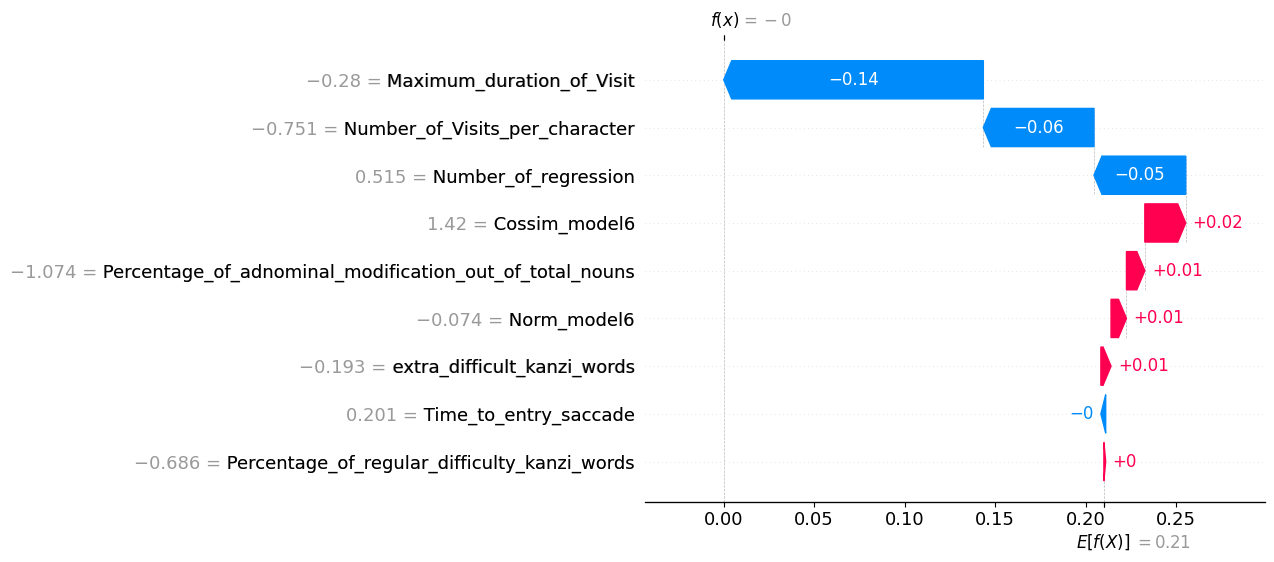

In [ ]:
shap.plots.waterfall(shap_values0[10], max_display=14, )

In [ ]:
random_search.best_estimator_.estimators[4]

('knn', KNeighborsClassifier(leaf_size=28))